# Time series forecasting of S&P 500 using ARIMA model

In [4]:
# Downloading S&P 500 Price Data
%pip install yfinance
import yfinance as yf

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 
import datetime



In [6]:
#installing library for projector part of porfolio optimisation
%pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Read the data

In [7]:
# Collect data over 5 years from yfinance for 4 companies

stk1= yf.download('F', start="2020-1-1",end="2025-1-1")
stk2=yf.download('AAPL',start="2020-1-1",end="2025-1-1")
stk3= yf.download('NFLX', start="2020-1-1",end="2025-1-1")
stk4=yf.download('GOOG',start="2020-1-1",end="2025-1-1")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
# data.to.csv('company')
# stk1.to_csv('FB.csv')
# stk2.to_csv('AAPL.csv')
# stk3.to_csv('NFLX.csv')
# stk4.to_csv('GOOG.csv')

fb_url='https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/FB%20(1).csv?token=GHSAT0AAAAAADANCOK4HUUHSBSMIVMIOZQ22A3HQOA'
apple_url='https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/AAPL%20(1).csv?token=GHSAT0AAAAAADANCOK5YA2KR6MUVPBLIMY62A3HPNQ'
netflix_url='https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/NFLX%20(1).csv?token=GHSAT0AAAAAADANCOK52QOB7U2CLYHR3B4U2A3HSUQ'
google_url='https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/GOOG%20(1).csv?token=GHSAT0AAAAAADANCOK5QGQNBJQLDFQJT7KS2A3HROQ'


In [13]:
#List of CSV files for each company
stock_csv=[fb_url]

#Read and preprocess the data for each CSV file
dataframes=[]
for file in stock_csv:
    df= pd.read_csv(file)
    dataframes.append(df)

#Combine the dataframes for each company into a single portfolio dataset
portfolio= pd.concat(dataframes)

#Display the portfolio dataset
portfolio.head()


    

,Date,Ticker,Close,High,Low,Open,Volume
0,1/2/20,F,7.309790,7.309790,7.131312,7.208911,43425700
1,1/3/20,F,7.146832,7.270989,7.100272,7.224430,45040800
2,1/6/20,F,7.108033,7.115793,7.030435,7.061474,43372300
3,1/7/20,F,7.177872,7.177872,7.076993,7.139072,44984100
4,1/8/20,F,7.177872,7.216671,7.115793,7.162352,45994900


In [ ]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5032 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5032 non-null   object 
 1   Ticker  5032 non-null   object 
 2   Close   5032 non-null   float64
 3   High    5032 non-null   float64
 4   Low     5032 non-null   float64
 5   Open    5032 non-null   float64
 6   Volume  5032 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 314.5+ KB


In [14]:
print(portfolio.columns)
portfolio.shape

Index(['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


(1258, 7)

In [15]:
portfolio.isnull().sum()

Date      0
Ticker    0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [17]:
#Calculate the portfolio returns, volatility, and other performance metrics
combined_data=portfolio

#Calculate daily returns for each stock
combined_data['Returns']=combined_data.groupby('Ticker')['Close'].pct_change()
combined_data.head()

,Date,Ticker,Close,High,Low,Open,Volume,Returns
0,1/2/20,F,7.309790,7.309790,7.131312,7.208911,43425700,NaN
1,1/3/20,F,7.146832,7.270989,7.100272,7.224430,45040800,-0.022293
2,1/6/20,F,7.108033,7.115793,7.030435,7.061474,43372300,-0.005429
3,1/7/20,F,7.177872,7.177872,7.076993,7.139072,44984100,0.009825
4,1/8/20,F,7.177872,7.216671,7.115793,7.162352,45994900,0.000000


In [18]:
#Fill the NaN value with the median of Returns column
combined_data['Returns'].fillna(combined_data['Returns'].median(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_35600\1641614356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['Returns'].fillna(combined_data['Returns'].median(),inplace=True)


In [19]:
#Calculate portfolio returns as the weighted average of individual stock returns on each day
portfolio_returns=combined_data.groupby('Date')['Returns'].mean()
portfolio_returns

Date
1/10/20   -0.001080
1/10/22   -0.024141
1/10/23    0.011820
1/10/24   -0.000845
1/11/21    0.033333
             ...   
9/8/23     0.028428
9/9/20    -0.008535
9/9/21    -0.020721
9/9/22    -0.003232
9/9/24     0.007561
Name: Returns, Length: 1258, dtype: float64

In [20]:
#Calculate portfolio volatility using standard deviation, if there are multiple stocks then it compares the stock returns data else 0
portfolio_volatility=combined_data.groupby('Date')['Returns'].std().fillna(0)
portfolio_volatility

Date
1/10/20    0.0
1/10/22    0.0
1/10/23    0.0
1/10/24    0.0
1/11/21    0.0
          ... 
9/8/23     0.0
9/9/20     0.0
9/9/21     0.0
9/9/22     0.0
9/9/24     0.0
Name: Returns, Length: 1258, dtype: float64

In [21]:
#There are typically 252 trading days in a year(considering weekends and holidays)

#Daily risk free rate 
rf_rate=0.03/252
portfolio_returns=pd.DataFrame(portfolio_returns).reset_index()

#excess returns of the portfolio
portfolio_excess=portfolio_returns['Returns']-rf_rate

#portfolio std. deviation(volatility)
portfolio_volatility=combined_data.groupby('Date')['Returns'].std()

#Sharpe-ratio
portfolio_sr=(portfolio_excess.mean()/portfolio_volatility)*np.sqrt(252)

#portfolio beta
cov_matrix=combined_data.groupby('Ticker')['Returns'].cov(combined_data['Returns'])
portfolio_beta=cov_matrix/combined_data['Returns'].var()

#print the calculated metrics
print("Portfolio sharpe ratio:",portfolio_sr)
print("Portfolio beta:",portfolio_beta)


Portfolio sharpe ratio: Date
1/10/20   NaN
1/10/22   NaN
1/10/23   NaN
1/10/24   NaN
1/11/21   NaN
           ..
9/8/23    NaN
9/9/20    NaN
9/9/21    NaN
9/9/22    NaN
9/9/24    NaN
Name: Returns, Length: 1258, dtype: float64
Portfolio beta: Ticker
F    1.0
Name: Returns, dtype: float64


In [22]:
#portfolio alpha
portfolio_beta=pd.DataFrame(portfolio_beta).reset_index()
portfolio_beta.rename(columns={'Returns':'Beta'},inplace=True)
combined_beta=combined_data.merge(portfolio_beta, on='Ticker', how='left')

portfolio_alpha=portfolio_excess-(combined_beta['Beta'].values * (combined_data['Returns']-rf_rate).values)
print("Portfolio Alpha",portfolio_alpha)

Portfolio Alpha 0      -0.001080
1      -0.001848
2       0.017249
3      -0.010670
4       0.033333
          ...   
1253    0.016307
1254   -0.013525
1255   -0.016749
1256    0.011723
1257    0.005537
Name: Returns, Length: 1258, dtype: float64


In [23]:
portfolio_alpha=pd.DataFrame(portfolio_alpha).reset_index()
portfolio_alpha.rename(columns={'Returns':'Alpha'},inplace=True)

In [27]:
combined_beta=combined_beta.reset_index()
combined_final=combined_beta.merge(portfolio_alpha,on='index',how='left')

In [28]:
final_df=combined_final.drop('index',axis=1)
final_df.head()

,level_0,Date,Ticker,Close,High,Low,Open,Volume,Returns,Beta,Alpha
0,0,1/2/20,F,7.309790,7.309790,7.131312,7.208911,43425700,0.000000,1.0,-0.001080
1,1,1/3/20,F,7.146832,7.270989,7.100272,7.224430,45040800,-0.022293,1.0,-0.001848
2,2,1/6/20,F,7.108033,7.115793,7.030435,7.061474,43372300,-0.005429,1.0,0.017249
3,3,1/7/20,F,7.177872,7.177872,7.076993,7.139072,44984100,0.009825,1.0,-0.010670
4,4,1/8/20,F,7.177872,7.216671,7.115793,7.162352,45994900,0.000000,1.0,0.033333


In [31]:
#Portfolio returns plot
import plotly.graph_objects as go
fig=go.Figure(data=go.Scatter(x=portfolio_returns['Date'],y=portfolio_returns['Returns'],mode='lines'))
fig.update_layout(title='Returns Plot',xaxis_title='Date',yaxis_title='Returns')
fig.show()

-which day it has got high returns which day it has got low returns 
-surge at steep depression stock volatility or stock risk got increased as well


## Moving averages

In [32]:
#Analyze trends, patterns, and corelations
final_df.set_index('Date', inplace=True)
final_df.head()

,level_0,Ticker,Close,High,Low,Open,Volume,Returns,Beta,Alpha
Date,,,,,,,,,,
1/2/20,0,F,7.309790,7.309790,7.131312,7.208911,43425700,0.000000,1.0,-0.001080
1/3/20,1,F,7.146832,7.270989,7.100272,7.224430,45040800,-0.022293,1.0,-0.001848
1/6/20,2,F,7.108033,7.115793,7.030435,7.061474,43372300,-0.005429,1.0,0.017249
1/7/20,3,F,7.177872,7.177872,7.076993,7.139072,44984100,0.009825,1.0,-0.010670
1/8/20,4,F,7.177872,7.216671,7.115793,7.162352,45994900,0.000000,1.0,0.033333


In [33]:
#Calculating moving averages
final_df['MA_20'] = final_df['Close'].rolling(window=20).mean()
final_df['MA_50'] = final_df['Close'].rolling(window=50).mean()
final_df

,level_0,Ticker,Close,High,Low,Open,Volume,Returns,Beta,Alpha,MA_20,MA_50
Date,,,,,,,,,,,,
1/2/20,0,F,7.309790,7.309790,7.131312,7.208911,43425700,0.000000,1.0,-0.001080,NaN,NaN
1/3/20,1,F,7.146832,7.270989,7.100272,7.224430,45040800,-0.022293,1.0,-0.001848,NaN,NaN
1/6/20,2,F,7.108033,7.115793,7.030435,7.061474,43372300,-0.005429,1.0,0.017249,NaN,NaN
1/7/20,3,F,7.177872,7.177872,7.076993,7.139072,44984100,0.009825,1.0,-0.010670,NaN,NaN
1/8/20,4,F,7.177872,7.216671,7.115793,7.162352,45994900,0.000000,1.0,0.033333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12/24/24,1253,F,9.702911,9.741646,9.577025,9.586708,29083100,0.012121,1.0,0.016307,10.088316,10.342206
12/26/24,1254,F,9.751328,9.799746,9.664176,9.683544,35922700,0.004990,1.0,-0.013525,10.038446,10.330108
12/27/24,1255,F,9.712594,9.877214,9.664176,9.712594,52899900,-0.003972,1.0,-0.016749,9.986639,10.313604


In [35]:
import plotly.graph_objects as go

#Create the figure and traces
fig=go.Figure()
fig.add_trace(go.Scatter(x=final_df.index, y=final_df['Close'], mode='lines', name='Close Price'))
fig.add_trace(go.Scatter(x=final_df.index, y=final_df['MA_20'], mode='lines', name='MA 20'))
fig.add_trace(go.Scatter(x=final_df.index, y=final_df['MA_50'], mode='lines', name='MA 50'))

#Update layout
fig.update_layout(
    title='Stock Price Analysis',
    xaxis_title='Date',
    yaxis_title='Price',
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        font=dict(size=12),
    ),
    autosize=False,
    width=800,
    height=500,
)

#Display figure
fig.show()

## Stock Simulation

In [36]:
#Simulate stock price movements using Monte Carlo Simulation
last_price = final_df['Close'][-1]#Get the last closing price
days=30 #Number of days for silulation
dt=1 #Time interval

returns=final_df['Returns'].mean() #Average Daily Returns
volatility = final_df['Returns'].std() #Standard deviation of daily returns

C:\Users\user\AppData\Local\Temp\ipykernel_35600\531761156.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [37]:
simulation_df=pd.DataFrame()
for i in range(200): # Perform 200 simulations
    prices=[last_price]
    for j in range(days):
        price = prices[-1]* (1+np.random.normal(returns, volatility)* np.sqrt(dt))
        prices.append(price)
    simulation_df[i]=prices

C:\Users\user\AppData\Local\Temp\ipykernel_35600\957465563.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\user\AppData\Local\Temp\ipykernel_35600\957465563.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\user\AppData\Local\Temp\ipykernel_35600\957465563.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame,

In [39]:
#Plot the simulated stock price movements
fig=go.Figure()

for col in simulation_df.columns:
    fig.add_trace(go.Scatter(x=simulation_df.index, y=simulation_df[col], name=f'Simulation{col+1}'))

fig.update_layout(
    title='Monte Carlo Simulation - Stock Price',
    xaxis_title='Days',
    yaxis_title='Price'
)

fig.show()

## Portfolio Optimization

In [55]:
import pandas as pd
import requests
from pypfopt import expected_returns, risk_models
from io import StringIO

#Define the URLs for the stock data

urls={
    
    'fb_url':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/AAPL%20(1).csv?token=GHSAT0AAAAAADANCOK4ULA3OEP3OHMGR4BI2A3KEGA',
#     'apple_url':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/AAPL%20(1).csv?token=GHSAT0AAAAAADANCOK54YRVMSLGCOBZUUM62A3KDZA',
#     'netflix_url':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/NFLX%20(1).csv?token=GHSAT0AAAAAADANCOK5GHVX6L7JANT2CNGS2A3IT6A',
#     'google_url':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/GOOG%20(1).csv?token=GHSAT0AAAAAADANCOK4JJ4KIAONNH76FRSS2A3KDJQ'
}
#Read stock data from the URLs and store them in a dictionary of DataFrames
dfs={}
for stock, url in urls.items():
    df= pd.read_csv(url)
    df['Date']=pd.to_datetime(df['Date'])
    df=df.set_index('Date')
    df=df[['Close']]#Select only the 'Close' column

    #Rename the 'Close' column to match the stock ticker
    df=df.rename(columns={'Close': stock})

    dfs[stock]=df

#Combine the stock data into a single DataFrame
combined_data=pd.concat(dfs.values(), axis=1)

#Remove any rows with missing values
combined_data=combined_data.dropna()

#Calculate expected returns and sample covariance
returns =expected_returns.mean_historical_return(combined_data)
cov_matrix= risk_models.sample_cov(combined_data)

#Print the expected returns and covariance matrix
print("Expecte returns")
print(returns)
print("\n Covariance Matrix")
print(cov_matrix)

from pypfopt import EfficientFrontier
#Perform portfolio optimisation 
ef = EfficientFrontier(returns, cov_matrix)
weights =ef.max_sharpe()
cleaned_weights=ef.clean_weights()
ef.portfolio_performance(verbose=True)

#Generate a range of target returns
target_returns = np.linspace(0.0, 0.18, num=100)

#Initialize empty lists to store portfolio statistics
volatility=[]
expected_return =[]

#Iterate over target returns and optimize portfolio for each target return
for target_return in target_returns:
    # Create a new instance of EfficientFrontier for each iteration
    ef= EfficientFrontier(returns, cov_matrix)
    weights =ef.efficient_return(target_return)
    perf = ef.portfolio_performance()
    volatility.append(perf[1])
    expected_return.append(perf[0])

import plotly.graph_objects as go

#Create a scatter plot for efficient frontier
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=volatility,
    y=expected_return,
    mode='markers',
    marker=dict(
        color='red',
        size=3,
        symbol='circle'
    ),
    name='Efficient Frontier'
))

#Create a line plot for efficient frontier
fig.add_trace(go.Scatter(
    x=volatility,
    y=expected_return,
    mode='lines',
    line=dict(
        color='blue',
        width=1.5
    ),
    showlegend=True
))

#Set plot layout
fig.update_layout(
    title='Efficient Frontier',

    xaxis=dict(title='Volatility'),
    yaxis=dict(title='Expected Return'),
    showlegend=True
)

# Show the plot
fig.show()



C:\Users\user\AppData\Local\Temp\ipykernel_35600\2689667744.py:19: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Expecte returns
fb_url    0.281057
dtype: float64

 Covariance Matrix
          fb_url
fb_url  0.100354
Expected annual return: 28.1%
Annual volatility: 31.7%
Sharpe Ratio: 0.89


In [21]:
import pandas as pd 
from pypfopt import expected_returns, risk_models, EfficientFrontier
import plotly.graph_objects as go

#Define the URLs for the stock data
urls={
    'fb_url':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/FB%20(1).csv',
    'apple_url':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/AAPL%20(1).csv',
    'netflix_url':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/NFLX%20(1).csv',
    'google_url':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/GOOG%20(1).csv'
 }

#Read stock data from the URLs and store them in a dictionary of DataFrames
dfs={}
for stock, url in urls.items():
    df = pd.read_csv(url)
    df['Date'] = pd.to_datetime(df['Date'])
    df=df.set_index('Date')
    df=df[['Close']]#Select only the 'Close' column

    #Rename the 'Close' column to match the stock symbol
    df=df.rename(columns={'Close':stock})
    dfs[stock]=df

#Combine the stock data into a single DataFrame
combined_data=pd.concat(dfs.values(), axis=1)

#Remove any rows with missing values
combined_data= combined_data.dropna()

#Initialize empty lists to store portfolio statistics for each stock
volatility={}
expected_return ={}

target_return=[-0.08924944785039354]#Out of all the stocks, the stock with max. negative value in this case of FB, all the stock returns can be above that value

#Iterate over each stock and perform portfolio optimization
for stock, df in dfs.items():
    #Calculate expected returns and sample covariance
    returns=expected_returns.mean_historical_return(df)
    cov_matrix = risk_models.sample_cov(df)
    i=0

    #Perform portfolio optimization
    ef=EfficientFrontier(returns, cov_matrix)
    print(max(returns))
    if i<=4:
        print(target_return[i],i)
        weights=ef.efficient_return(target_return[i])

    cleaned_weights=ef.clean_weights()
    perf=ef.portfolio_performance(verbose=False)

    #Store portfolio statistics for the stock
    volatility[stock]=perf[1]
    expected_return[stock]=perf[0]

print(volatility)
print(expected_return)

C:\Users\user\AppData\Local\Temp\ipykernel_34144\1444944511.py:17: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\user\AppData\Local\Temp\ipykernel_34144\1444944511.py:17: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



0.0558668056001157
-0.08924944785039354 0
0.28105680890943074
-0.08924944785039354 0
0.22056261353860518
-0.08924944785039354 0
0.22886750765499553
-0.08924944785039354 0
{'fb_url': np.float64(0.44501398817953436), 'apple_url': np.float64(0.3167863160668455), 'netflix_url': np.float64(0.45523757903614975), 'google_url': np.float64(0.3238495316440179)}
{'fb_url': np.float64(0.05586680559577953), 'apple_url': np.float64(0.28105680888631485), 'netflix_url': np.float64(0.22056261352559792), 'google_url': np.float64(0.2288675076361624)}


In [22]:
#Create a scatter plot for each stock's efficient frontier
fig=go.Figure()
for stock in dfs.keys():
    fig.add_trace(go.Scatter(
        x=[volatility[stock]],
        y=[expected_return[stock]],
        mode='markers',
        marker=dict(
            size=50,
            symbol='circle'
        ),
        name=stock
    ))

#Set plot layout
fig.update_layout(
    title='Efficient Frontier',
    xaxis=dict(title='Volatility'),
    yaxis=dict(title='Expected Return'),
    showlegend=True
)

#Show the plot
fig.show()


## Risk and Performance Analysis

In [20]:
#Risk Analysis and Performance Analysis
import pandas as pd 
from pypfopt import expected_returns, risk_models, EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation
import numpy as np

#Define the URLs for stock data 
urls={
'fb':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/FB%20(1).csv'
# apple='https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/AAPL%20(1).csv?token=GHSAT0AAAAAADANCOK52CFJQ3G36SNLS6WU2A2REJQ'
# netflix='https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/NFLX%20(1).csv?token=GHSAT0AAAAAADANCOK5J7X46XOI2G3AYU7I2A2RE7Q'
# google='https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/GOOG%20(1).csv?token=GHSAT0AAAAAADANCOK5SGA2R5IS2QR7EOIC2A2RFSQ'

}

#Read stock data from the URLs and store them in a dictionary of DataFrames
dfs={}
for stock, url in urls.items():
    df=pd.read_csv(url)
    df['Date']=pd.to_datetime(df['Date'])
    df=df.set_index('Date')
    df=df[['Close']]#Select only the 'Close' column

    #Rename the 'Close' column to match the stock ticker
    df=df.rename(columns={'Close': stock})

    dfs[stock]=df

#Combine the stock data into a single DataFrame
combined_data=pd.concat(dfs.values(), axis=1)

#Remove any rows with missing values
combined_data=combined_data.dropna()

#Perform portfolio optimisation 
ef = EfficientFrontier(returns, cov_matrix)
weights =ef.max_sharpe()
cleaned_weights=ef.clean_weights()
ef.portfolio_performance(verbose=False)

#Print portfolio statistics
print("Portfolio Performance:")
print("Expected Return:", perf[0])
print("Volatility",perf[1])
print("Sharpe ratio",perf[2])

#Risk Analysis Simulation
print("\nRisk Analysis Simulations")
weights_array =np.array(list(weights.values()))
port_returns=np.dot(combined_data.pct_change().dropna().values,weights_array)
var_95=np.percentile(port_returns,5)
var_99=np.percentile(port_returns,1)
print("Var (95% Confidence)",var_95)
print("Var (95% Confidence)",var_99)

#Simulate portfolio performance under different risk scenarios
simulated_returns=np.random.normal(perf[0],perf[1],size=(1000, len(weights)))
simulated_portfolio_val=np.dot(simulated_returns,weights_array)
simulated_portfolio_returns=simulated_portfolio_val/simulated_portfolio_val[0]-1

#Performance Analysis
print("\nPerformance Analysis")
print("Sharpe Ratio:", np.mean(simulated_portfolio_returns)/np.std(simulated_portfolio_returns))

C:\Users\user\AppData\Local\Temp\ipykernel_34144\1403734714.py:20: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Portfolio Performance:
Expected Return: 0.2288675076361624
Volatility 0.3238495316440179
Sharpe ratio 0.7067093982638155

Risk Analysis Simulations
Var (95% Confidence) -0.03953122917392644
Var (95% Confidence) -0.08370289865209095

Performance Analysis
Sharpe Ratio: -0.8773714570632886


##Stock Price Prediction

In [24]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


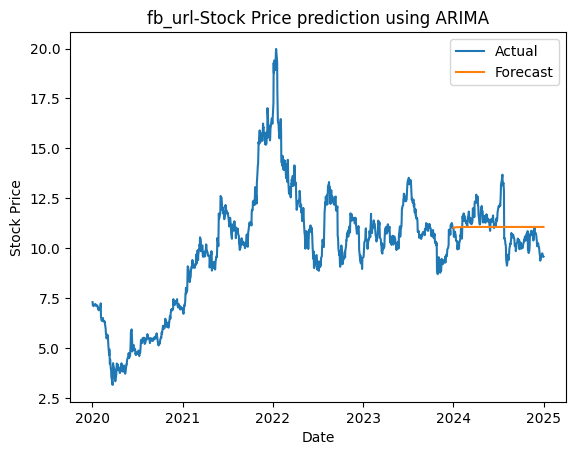

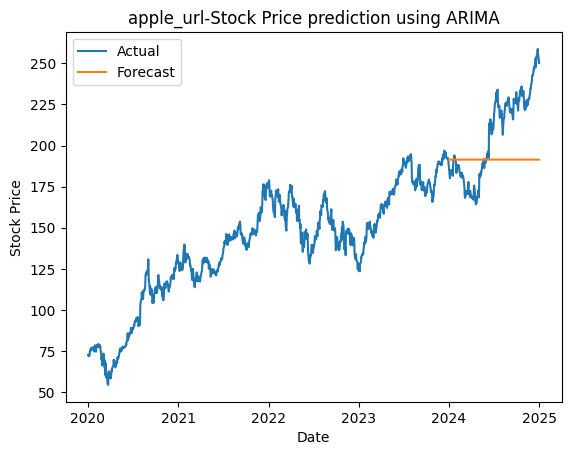

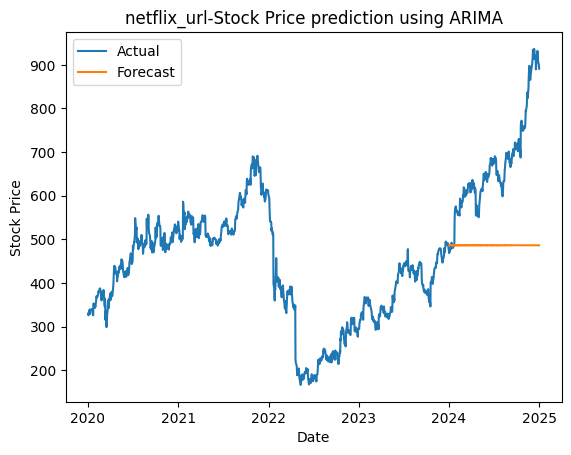

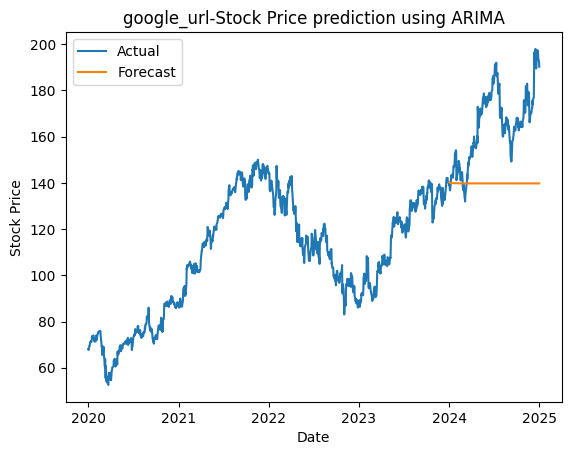

In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

def predictStock(url,stock):
    df=pd.read_csv(url)
    df['Date']=pd.to_datetime(df['Date'])
    #Set 'Date col. as the index
    df=df.set_index('Date')

    #Set the 'Close' column for stock prices
    data=df['Close']

    #Split the data into training and testing sets
    train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

    #Fit the ARIMA Model to the training data and compare the model performance
    model= ARIMA(train_data, order=(2,1,2)) # Example order(p,d,q)
    model_fit=model.fit()

    #Forecast future stock prices using the trained model
    start_index=len(train_data)
    end_index=len(train_data)+ len(test_data)-1
    forecast= model_fit.predict(start=start_index,end=end_index)

    #Evaluate the predictions
    mse=mean_squared_error(test_data, forecast)
    rmse=np.sqrt(mse)

    #Plot the actual stock prices and the predicted values
    plt.plot(df.index, data, label='Actual')
    plt.plot(test_data.index, forecast, label='Forecast')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'{stock}-Stock Price prediction using ARIMA')
    plt.legend()
    plt.show()

#Define the URLs for stock data 
urls={
    'fb_url':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/FB%20(1).csv',
    'apple_url':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/AAPL%20(1).csv',
    'netflix_url':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/NFLX%20(1).csv',
    'google_url':'https://raw.githubusercontent.com/AbhisiktaM/time_series_assignment/refs/heads/main/GOOG%20(1).csv'
}
for stock, url in urls.items():
    predictStock(url,stock)


In [30]:
%pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.2/11.1 MB 5.0 MB/s eta 0:00:03
   - -------------------------------------- 0.5/11.1 MB 5.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/11.1 MB 4.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.1 MB 5.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/11.1 MB 5.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.1 MB 5.8 MB/s eta 0:00:02
   ------ ----------------------


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
